In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("brain_stroke.csv")
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


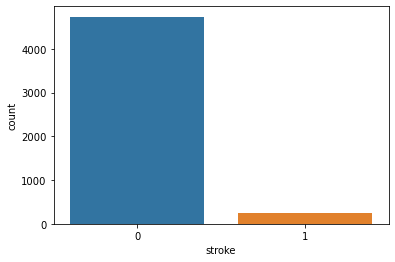

In [3]:
sns.countplot(data["stroke"]) # abnormal and normal
plt.show()

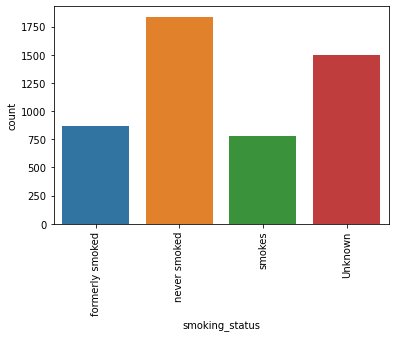

In [5]:
sns.countplot(x = "smoking_status", data = data)
plt.xticks(rotation = 90)
plt.show()

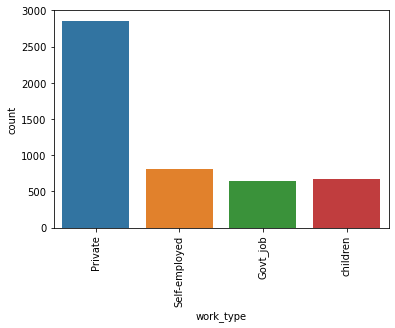

In [6]:
sns.countplot(x = "work_type", data = data)
plt.xticks(rotation = 90)
plt.show()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


Logistic Regression Model

In [12]:
data = data.select_dtypes(exclude=['object'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4981 non-null   float64
 1   hypertension       4981 non-null   int64  
 2   heart_disease      4981 non-null   int64  
 3   avg_glucose_level  4981 non-null   float64
 4   bmi                4981 non-null   float64
 5   stroke             4981 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 233.6 KB


In [13]:
y = data["stroke"].values
x_data = data.drop(["stroke"], axis = 1) # seperate the stroke from data set

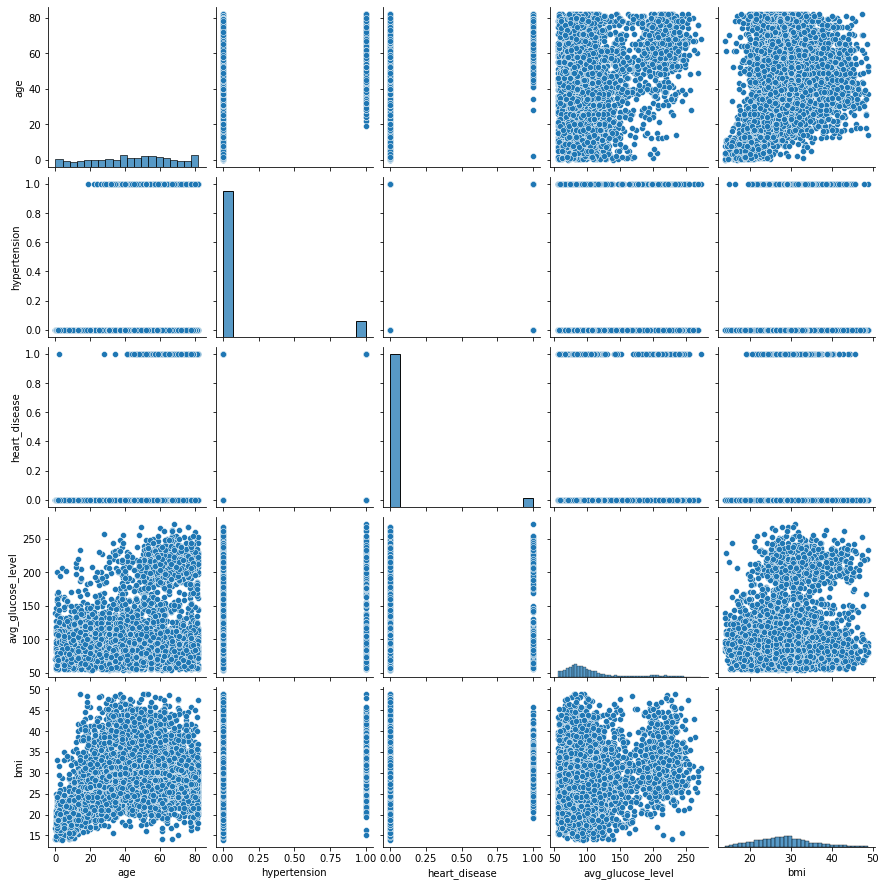

In [14]:
sns.pairplot(x_data)
plt.show()

Data Normalization

In [15]:
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values

In [16]:
# Train Test division
from sklearn.model_selection import train_test_split

In [17]:
# 15% test set, 85% train set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 42)

# transpose
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (5, 4233)
x_test:  (5, 748)
y_train:  (4233,)
y_test:  (748,)


In [18]:
# initialization
def InitializationWeightTrend(size):
    w = np.full((size, 1), 0.01)
    b = 0.0
    return w, b

In [19]:
# sigmoid
def sigmoid(z):
    y_head = 1/ (1 + np.exp(-z))
    return y_head
sigmoid(0)

0.5

In [20]:
def backForthProp(w, b, x_train, y_train):
    # forward
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -y_train * np.log(y_head)-(1-y_train) * np.log(1-y_head) # lost
    cost = (np.sum(loss)) / x_train.shape[1] # cost
    
    #backward
    derivative_weight = (np.dot(x_train, ((y_train.T))) / x_train.shape[1])
    derivative_bias = np.sum(y_head - y_train) / x_train.shape[1]
    
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    
    return cost, gradients

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train.T, y_train.T)

LogisticRegression()

In [22]:
# test
test_accuracy = lr.score(x_test.T, y_test.T)
print("Test Accuracy: {}".format(test_accuracy))

Test Accuracy: 0.946524064171123
